In [ ]:
#manual eval bc of course nothing can be straightforward

In [ ]:
import math
from math import sqrt
from sklearn.metrics import precision_score
import numpy as np

def evalsuite(preds, labels):
  trueneg = 0
  truepos = 0
  falseneg = 0
  falsepos = 0

  fxp = []



  for label, pred in zip(labels, preds):

    if pd.isna(pred):
      print(pred, label)
    if pred == -1:
      print(pred, label)
      if label == 1:
        pred = 0
      if label == 0:
        pred = 1
    fxp.append(pred)

    if label + pred == 2:
      truepos = truepos +1
    elif label + pred == 0:
      trueneg = trueneg +1
    elif label == 0 and pred == 1 :
      falsepos = falsepos +1
    elif label == 1 and pred == 0:
      falseneg = falseneg +1
 # print( "trueneg: ", trueneg, "truepos: ", truepos, "falseng: ", falseneg, "falsepos: ", falsepos)
  print(fxp)
  if np.isnan(fxp).any():
      fxp = np.nan_to_num(fxp, nan=1.0)

  macro = precision_score(labels, fxp, average='macro')
  micro = precision_score(labels, fxp, average='micro')

  accuracy = (truepos + trueneg) /len(labels)

  if truepos+falsepos == 0 :
    precision =0
  else:
    precision = truepos /(truepos + falsepos)

  if truepos + falseneg == 0:
    recall = 0
  else:
    recall = truepos / (truepos + falseneg)

  if precision + recall == 0:
    f1 = 0
  else:
    f1 = 2*(precision*recall)/(precision + recall)

  #sensitivity = is the same as recall
  if trueneg + falsepos == 0:
    specificity = 0
  else:
    specificity = trueneg / (trueneg + falsepos)

  if sqrt((truepos+falsepos)*(truepos + falseneg)*(trueneg+ falsepos)*(trueneg +falseneg))== 0:
    mcc = 0
  else:
    mcc = ((trueneg * truepos)-(falseneg*falsepos))/sqrt((truepos+falsepos)*(truepos + falseneg)*(trueneg+ falsepos)*(trueneg +falseneg))
  return "acc: ", accuracy, "precision: ", precision, "recall: ", recall, "f1: ", f1, "specificity: ", specificity, "mcc: ", mcc, "mac pre ", macro, "micro pre ", micro


# Prev ver

In [ ]:
#fix that one svm bc labels are backwards

In [ ]:
#get all rows where the vers with history had changes from the ones without and take a look

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/predictionsdf.tsv", sep='\t')
print(df)

      Unnamed: 0.7  Unnamed: 0.6  Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  \
0                0             0             0             0             0   
1                1             1             1             1             1   
2                2             2             2             2             2   
3                3             3             3             3             3   
4                4             4             4             4             4   
...            ...           ...           ...           ...           ...   
2400          2400          2400          2400          2400          2400   
2401          2401          2401          2401          2401          2401   
2402          2402          2402          2402          2402          2402   
2403          2403          2403          2403          2403          2403   
2404          2404          2404          2404          2404          2404   

      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            mid  \


In [ ]:
def invertlist(list):
    return [1 - x for x in list]

fxsvm = invertlist(df['svmhistorypred'])
fxlabels = invertlist(df['svmhistorylabelsT1D0'])

svmwhistory = evalsuite(fxsvm, fxlabels)
print("SVM with histoyr: ", svmwhistory)

svm = invertlist(df['svmpred'])
lbls = invertlist(df['svmlabelsT1D0'])

svm = evalsuite(svm, lbls)
print("SVM: ", svm)



robertawhistory = evalsuite(df['robertahistorypred'], df['robertahistorylabelsT0D1'])
print("roberta w history: ", robertawhistory)


roberta= evalsuite(df['robertapred'], df['robertalabelsT0D1'])
print("roberta : ", roberta)


mbertwhistory = evalsuite(df['mberthistorypred'], df['mberthistorylabelsT0D1'])
print("mbertwhistory: ", mbertwhistory)

mbert = evalsuite(df['mbertpred'], df['mbertlabelsT0D1'])
print("mbert: ", mbert)

trueneg:  1959 trueos:  0 falseng:  0 falseos:  14
SVM with histoyr:  ('acc: ', 0.8145530145530145, 'recision: ', 0.0, 'recall: ', 0, 'f1: ', 0, 'secificity: ', 0.9929042067916878, 'mcc: ', 0)
trueneg:  1973 trueos:  0 falseng:  0 falseos:  0
SVM:  ('acc: ', 0.8203742203742204, 'recision: ', 0, 'recall: ', 0, 'f1: ', 0, 'secificity: ', 1.0, 'mcc: ', 0)
trueneg:  1973 trueos:  0 falseng:  0 falseos:  0
roberta w history:  ('acc: ', 0.8203742203742204, 'recision: ', 0, 'recall: ', 0, 'f1: ', 0, 'secificity: ', 1.0, 'mcc: ', 0)
trueneg:  1973 trueos:  0 falseng:  0 falseos:  0
roberta :  ('acc: ', 0.8203742203742204, 'recision: ', 0, 'recall: ', 0, 'f1: ', 0, 'secificity: ', 1.0, 'mcc: ', 0)
trueneg:  1702 trueos:  48 falseng:  0 falseos:  271
mbertwhistory:  ('acc: ', 0.7276507276507277, 'recision: ', 0.15047021943573669, 'recall: ', 1.0, 'f1: ', 0.2615803814713897, 'secificity: ', 0.8626457171819564, 'mcc: ', 0.36028112684356284)
trueneg:  1973 trueos:  0 falseng:  0 falseos:  0
mbert: 

In [ ]:
mberthistorychange = df[df['mbertpred'] != df['mberthistorypred']]

In [ ]:
print(len(mberthistorychange), len(mberthistorychange[mberthistorychange['mberthistorypred'] != 1]))

319 0


In [ ]:
svmhistorychange = df[df['svmpred'] != df['svmhistorypred']]

In [ ]:
print(len(svmhistorychange), len(svmhistorychange[svmhistorychange['svmhistorypred'] != 0]))

14 0


In [ ]:
geminidf = pd.read_csv("/content/drive/MyDrive/geminialldone.tsv", sep='\t')


In [ ]:
geminidf['labelffx'] = geminidf['label'].map({'T': 0, 'D': 1})
print(geminidf)

      Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0            mid  \
0                0             0             0        1710  1VVGAqnFM9y0o   
1                1             1             1        1711    OJJPBkWizpG   
2                2             2             2        1712   nGGg4Vxtl2Xr   
3                3             3             3        1713    wnnK488C8mn   
4                4             4             4        1714  m77Y4VoFj974E   
...            ...           ...           ...         ...            ...   
2400          2400          2400          2400          36  xooqrjOHJqLzp   
2401          2401          2401          2401          37   1VV1vpEiqE9M   
2402          2402          2402          2402          38  nGGQ9mvu70A9O   
2403          2403          2403          2403          39  g77Y9KVhlpWLJ   
2404          2404          2404          2404          40   JEED9jxUwokQ   

             persuasion deception label    player  \
0             assertio

In [ ]:
gem = evalsuite(geminidf['gemresfix'], geminidf['labelffx'])
print("gemini: ", gem)

trueneg:  1409 trueos:  165 falseng:  0 falseos:  564
gemini:  ('acc: ', 0.6544698544698545, 'recision: ', 0.22633744855967078, 'recall: ', 1.0, 'f1: ', 0.3691275167785235, 'secificity: ', 0.7141409021794222, 'mcc: ', 0.40204083090078285)


In [ ]:
gemwhis = evalsuite(geminidf['gemreswhistoryfix'], geminidf['labelffx'])
print("geminiwhis: ", gemwhis)

trueneg:  1007 trueos:  227 falseng:  0 falseos:  966
geminiwhis:  ('acc: ', 0.5130977130977131, 'recision: ', 0.19027661357921208, 'recall: ', 1.0, 'f1: ', 0.31971830985915495, 'secificity: ', 0.5103902686264572, 'mcc: ', 0.31163332927982307)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:

def whyres(df, labels, preds, historypreds):
  df['hislen'] = df['msgAndHistory'].str.len()
  df['len'] = df['withName'].str.len()
  #print(df[preds].sum())
  #print(df[historypreds].sum())


  histchange = df[df[preds] != df[historypreds]]
  print('len diffs ', len(histchange))

  errors = df[df[preds] != df[labels]]
  print('len no history errors ',len(errors))


  histerrors = df[df[historypreds] != df[labels]]
  print('len history errors ',len(histerrors))




  plt.figure(figsize=(10, 6))

  plt.hist(df['len'], bins='auto',
         alpha=0.7, color='red', edgecolor='black',
         label='wout his')


  plt.hist(errors['len'], bins='auto',
          alpha=0.7, color='green', edgecolor='black',
          label='wout his errors')

  plt.title('no history len v fails ')
  plt.xlabel('len')
  plt.ylabel('# of times')
  plt.legend()
  plt.show()


  plt.figure(figsize=(10, 6))
  plt.hist(df['hislen'], bins='auto',
         alpha=0.7, color='blue', edgecolor='black',
         label='w his')

  plt.hist(histerrors['hislen'], bins='auto',
         alpha=0.7, color='grey', edgecolor='black',
         label='w his errors')

  plt.title('whistory len fails ')
  plt.xlabel('len')
  plt.ylabel('# of times')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))

  plt.figure(figsize=(10, 6))
  df['file'].value_counts().plot(kind='bar', color='blue', label='all data')

  histerrors['file'].value_counts().plot(kind='bar', color='green', label='with history errors')
  errors['file'].value_counts().plot(kind='bar', color='red', label='no history errors')
  plt.title(f' file hits')
  plt.xlabel('Filename')
  plt.ylabel('num hits')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.legend()
  plt.show()
  #print('file in whole dataset',df['file'].value_counts())
  #print('file in no history error ',errors['file'].value_counts())
  #print('file in  history error ',histerrors['file'].value_counts())


len diffs  854
len no history errors  831
len history errors  1171


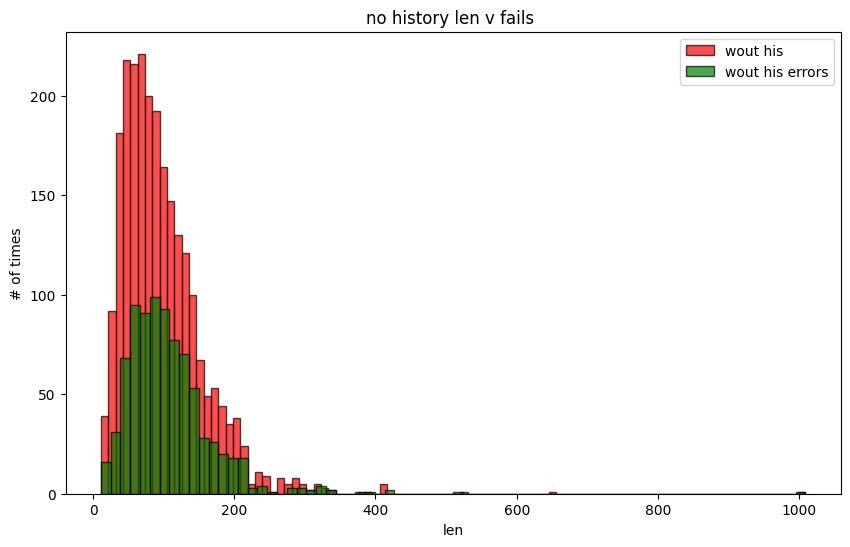

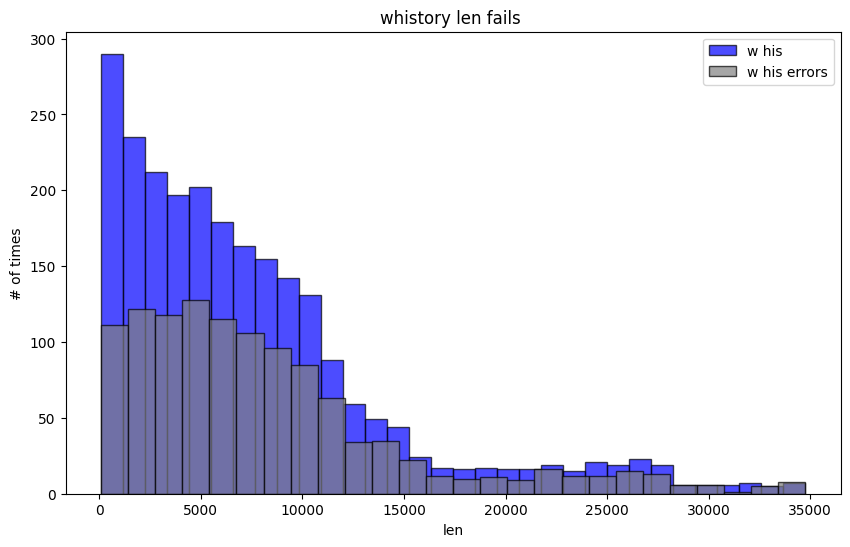

<Figure size 1000x600 with 0 Axes>

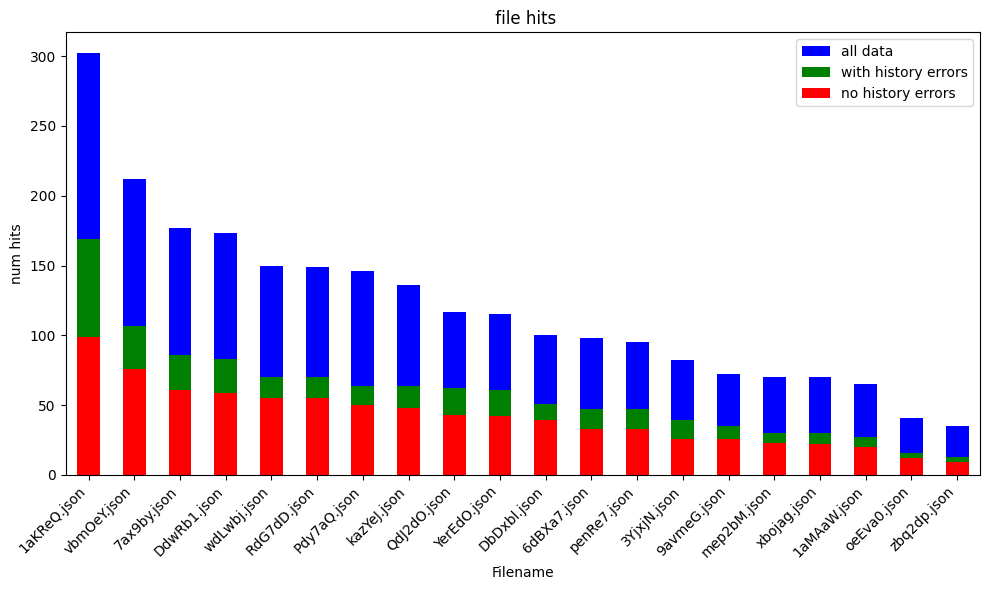

In [ ]:
whyres(geminidf, 'labelffx', 'gemresfix', 'gemreswhistoryfix' )

In [ ]:
#def check(row):


def whyresagain(df, model, labelcol, nhcol, whcol):
  df["errcheck" + model] = ""
  for i, (index, row) in enumerate(df.iterrows()):
        if row[labelcol] != row[nhcol] and row[labelcol]!= row[whcol]:
          label = "Both error" #both error
        elif row[labelcol] == row[nhcol] and row[labelcol]!= row[whcol] :
          label = "history error" #history error
        elif row[labelcol] != row[nhcol] and row[labelcol] == row[whcol] :
          label = "no history error" #no history error
        elif row[labelcol] == row[nhcol] and row[labelcol] == row[whcol] :
          label = "all good" #all good
        else:
          print("oh no")
          break
        df.at[index, "errcheck " + model] = label
  return df




In [ ]:
gemdf = whyresagain(geminidf, "gemini", 'labelffx', 'gemresfix', 'gemreswhistoryfix')

In [ ]:
gemdf["errcheck gemini"].value_counts()

,count
errcheck gemini,
all good,977
history error,597
Both error,574
no history error,257


this is on the no history

In [ ]:
gemdf['nhlen'] = gemdf['withName'].str.len()
gemdf['hlen'] = gemdf['msgAndHistory'].str.len()
lenresnh = gemdf.groupby("errcheck gemini")['nhlen'].agg('mean')
print(lenresnh)

errcheck gemini
Both error          109.012195
all good             87.624360
history error       101.296482
no history error    103.887160
Name: nhlen, dtype: float64


history ver

In [ ]:
gemdf['hlen'] = gemdf['msgAndHistory'].str.len()
lenresh = gemdf.groupby("errcheck gemini")['hlen'].agg('mean')
print(lenresh)

errcheck gemini
Both error          8345.229965
all good            6560.756397
history error       8375.586265
no history error    7724.673152
Name: hlen, dtype: float64


In [ ]:
#ok so checking correlation of message length on label basically longer messages are more likely to have errors with both and the shorter messages are better



In [ ]:
#so player and num messed up original attempt, so using the msg only to check for word stuff

geminidf['msg'].value_counts().head(30)

,count
msg,
well well well,5
but opposing the only person declaring as percival is inefficient because we would have so much more to lose than gain.,3
agree,3
i agree too.,2
"i generally think that both player-2 and player-3 are slowly struggling to make consistent arguments, thus i now belief that both of them are on the same evil team",2
player-4 is a bit too defensive to some comments that was not based on clear logic lines and evidence.,2
"i would agree with this composition but i have no info on who to bring on next, but i think this one is likely to succeed if we choose to right person",2
"i would propose to send me, player-2, player-6, and finally either player-5 or player-4 on the quest.",2
once again we can observe player-2 and player-3 are the only ones to vote yes for the previous party proposal while all else voted no which is suspicious. i remain suspicious of both player-2 and player-3.,2


BELOW CONTAINS FIXED DATA VERS

# No duplicates ver

In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/llm decetion/predictionsfixed.tsv", sep='\t')

In [ ]:
def invertlist(list):
    return [1 - x for x in list]

fxsvm = invertlist(df['svmhistorypred'])
fxlabels = invertlist(df['svmhistorylabelsT1D0'])

svmwhistory = evalsuite(fxsvm, fxlabels)
print("SVM with histoyr: ", svmwhistory)

svm = invertlist(df['svmpred'])
lbls = invertlist(df['svmlabelsT1D0'])

svm = evalsuite(svm, lbls)
print("SVM: ", svm)



robertawhistory = evalsuite(df['robertahistorypred'], df['robertahistorylabelsT0D1'])
print("roberta w history: ", robertawhistory)


roberta= evalsuite(df['robertapred'], df['robertalabelsT0D1'])
print("roberta : ", roberta)


mbertwhistory = evalsuite(df['mberthistorypred'], df['mberthistorylabelsT0D1'])
print("mbertwhistory: ", mbertwhistory)

mbert = evalsuite(df['mbertpred'], df['mbertlabelsT0D1'])
print("mbert: ", mbert)

SVM with histoyr:  ('acc: ', 0.8145973154362416, 'precision: ', 0.0, 'recall: ', 0.0, 'f1: ', 0, 'specificity: ', 0.9928425357873211, 'mcc: ', -0.035952351748025455, 'mac pre ', 0.40970464135021095, 'micro pre ', 0.8145973154362416)
SVM:  ('acc: ', 0.8204697986577181, 'precision: ', 0, 'recall: ', 0.0, 'f1: ', 0, 'specificity: ', 1.0, 'mcc: ', 0, 'mac pre ', 0.41023489932885904, 'micro pre ', 0.8204697986577181)
roberta w history:  ('acc: ', 0.8204697986577181, 'precision: ', 0, 'recall: ', 0.0, 'f1: ', 0, 'specificity: ', 1.0, 'mcc: ', 0, 'mac pre ', 0.41023489932885904, 'micro pre ', 0.8204697986577181)
roberta :  ('acc: ', 0.8204697986577181, 'precision: ', 0, 'recall: ', 0.0, 'f1: ', 0, 'specificity: ', 1.0, 'mcc: ', 0, 'mac pre ', 0.41023489932885904, 'micro pre ', 0.8204697986577181)
mbertwhistory:  ('acc: ', 0.7273489932885906, 'precision: ', 0.14873417721518986, 'recall: ', 0.10981308411214953, 'f1: ', 0.12634408602150535, 'specificity: ', 0.8624744376278118, 'mcc: ', -0.031366

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
import collections
from collections import Counter
import re
def reseval(df, model):

  df['msglen'] = df['msg'].str.len()
  dmlen = df.groupby('errcheck' +model)['msglen'].agg('mean')

  print("msg len avg ", dmlen)
  df['hislen'] = df['msgAndHistory'].str.len()

  dhlen = df.groupby('errcheck' +model)['hislen'].agg('mean')

  print("history len avg ",dhlen )

  dfg = df.groupby('errcheck'+model)
  for g, gdf in dfg:
    words =  gdf['msg'].apply(lambda c: re.findall(r"\w+", c.lower(), re.UNICODE))

    wc = Counter(words)
    print(" msot freq words in ", g, " ", wc.most_common(10) )

    print("most freq msgs " ,g, " " , gdf['msg'].value_counts().head(5))

    #print(words)






In [ ]:
def whyresagain(df, model, labelcol, nhcol, whcol):
  df["errcheck" + model] = ""
  for i, (index, row) in enumerate(df.iterrows()):
        #print(row)
        if row[labelcol] != row[nhcol] and row[labelcol]!= row[whcol]:
          label = "Both error" #both error
        elif row[labelcol] == row[nhcol] and row[labelcol]!= row[whcol] :
          label = "history error" #history error
        elif row[labelcol] != row[nhcol] and row[labelcol] == row[whcol] :
          label = "no history error" #no history error
        elif row[labelcol] == row[nhcol] and row[labelcol] == row[whcol] :
          label = "all good" #all good
        else:
          print("oh no")
          break
        df.at[index, "errcheck" + model] = label
  return df

#dfnew = whyresagain(df, 'mbert', 'mbertlabelsT0D1', 'mbertpred', 'mberthistorypred')


In [ ]:
dfnew = whyresagain(df, 'mbert', 'mbertlabelsT0D1', 'mbertpred', 'mberthistorypred')
#print(dfnew['errcheckmbert'].value_counts())
#print(dfnew['errcheckmbert'])

reseval(dfnew, 'mbert')

msg len avg  errcheckmbert
Both error          103.587927
all good             83.561352
history error        83.312268
no history error    109.659574
Name: msglen, dtype: float64
history len avg  errcheckmbert
Both error          8082.992126
all good            7946.071725
history error       3423.111524
no history error    4241.319149
Name: hislen, dtype: float64


TypeError: unhashable type: 'list'

In [ ]:
df = df.drop(columns=['Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6','Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2','Unnamed: 0.1', 'Unnamed: 0'])
print(df.columns)

Index(['mid', 'persuasion', 'deception', 'label', 'player', 'msg', 'quest',
       'turn', 'file', 'withName', 'history', 'msgAndHistory',
       'svmhistorypred', 'svmhistorylabelsT1D0', 'svmpred', 'svmlabelsT1D0',
       'robertahistorypred', 'robertahistorylabelsT0D1', 'mberthistorypred',
       'mberthistorylabelsT0D1', 'mbertpred', 'mbertlabelsT0D1', 'robertapred',
       'robertalabelsT0D1', 'errcheckmbert', 'msglen', 'hislen'],
      dtype='object')


In [ ]:
d = df.loc[df["label"] == "D"]
print(d)

                mid           persuasion   deception label    player  \
6     0AA0zBNf2qloK            assertion    omission     D  player-5   
10     8XXMLNXT28Q5            assertion    omission     D  player-1   
21     ypp9gGWSYkqN            assertion   influence     D  player-1   
28    oAAj4xkUXxRp4            assertion    omission     D  player-5   
29    P66zDBvtKWX6K          questioning  commission     D  player-5   
...             ...                  ...         ...   ...       ...   
2366  nGGQ9N8i7Kzzp            assertion   influence     D  player-6   
2373  3YYRxVlsmp5O0  critique/opposition   influence     D  player-2   
2374   7DD8BVOcLgKp            assertion  commission     D  player-2   
2375   VJJpVnySxg31            assertion  commission     D  player-2   
2376   wnn9q7vFVVNR  critique/opposition  commission     D  player-2   

                                                    msg  quest  turn  \
6     random selection apart from the previous two p...      2 

In [ ]:
#findinf patterns in the deceptive messages

In [ ]:
words =  d['msg'].apply(lambda c: re.findall(r"\w+", c.lower(), re.UNICODE))
wlist = [w for ws in words for w in ws]
wc = Counter(wlist)
print(wc.most_common(15))

[('i', 467), ('player', 435), ('the', 348), ('to', 285), ('and', 184), ('is', 183), ('that', 165), ('on', 133), ('it', 129), ('party', 128), ('good', 117), ('of', 114), ('this', 106), ('a', 101), ('t', 95)]


In [ ]:
import transformers
from transformers import pipeline


In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
d['sentiment'] = ""
#https://huggingface.co/blog/sentiment-analysis-python
for i, (index, row) in enumerate(d.iterrows()):

      #label = llmCall(prompt, row[column])
      res = sentiment_pipeline(row['msg'])
      #print(res[0]['label'])
      d.at[index, 'sentiment'] = res[0]['label']
#data = ["I love you", "I hate you"]
#sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
<ipython-input-11-f67ee82e504c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
d['sentiment'].value_counts()

,count
sentiment,
NEGATIVE,300
POSITIVE,128


In [ ]:
!pip install keybert
!pip install keyphrase-vectorizers

In [ ]:
import keyphrase_vectorizers
import keybert
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

In [ ]:
#https://towardsdatascience.com/enhancing-keybert-keyword-extraction-results-with-keyphrasevectorizers-3796fa93f4db/
kw_model = KeyBERT()
textlist = ' '.join(d['msg'])
kw_model.extract_keywords(docs=textlist, vectorizer=KeyphraseCountVectorizer(), top_n = 10)

[('uninvolved second evil player', 0.4966),
 ('unlucky party pick', 0.4895),
 ('evil player', 0.453),
 ('merlin', 0.4299),
 ('1st quest party members', 0.4027),
 ('belief player-6', 0.3998),
 ('player-5', 0.3957),
 ('player-4 hm', 0.3915),
 ('player-6', 0.3897),
 ('weird player-1', 0.376)]

In [ ]:
textlist = '. '.join(d['msg'])
for m in d['msg']:
  print(m)

random selection apart from the previous two people of the last quest
hm, again, not much to start making claims about, but it's a little odd.
hm, yeah, either we got very lucky, or some evil is hiding
yeah, its unlikely this one would pass, but i don't have any additional info to suggest anything else, so i guess i'm fine with this.
also, player-6 seems a little suspicious, looks like he has some additional info, he might be evil or he might be merlin as well
i agree that it's weird that player-5 tries to call out merlin. doesn't seem to me like something a good person would do.
i would say that the current setup would fail since i know im good and since i'm not included in this party there is one evil person in it
if this fails, i would be suspicious of player-6 a little bit
also just out of curiosity( i don't think you're evil, just asking), if you think im not evil why did you not vote for the last party? question for player-4
hm, the consensus seems to be that player-6 and player-

In [ ]:
generator = pipeline('text-generation', model='gpt2')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
res = generator(textlist, num_return_sequences=3)

Token indices sequence length is longer than the specified maximum sequence length for this model (10754 > 1024). Running this sequence through the model will result in indexing errors
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ValueError: Input length of input_ids is 10754, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

In [ ]:
print(res)

# gemini vers check [re ran]

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/promptcheck.tsv", sep='\t' )


In [ ]:
print(df)

     Unnamed: 0.14  Unnamed: 0.13  Unnamed: 0.12  Unnamed: 0.11  \
0                0              0              0              0   
1                1              1              1              1   
2                2              2              2              2   
3                3              3              3              3   
4                4              4              4              4   
..             ...            ...            ...            ...   
475            475            475            475            475   
476            476            476            476            476   
477            477            477            477            477   
478            478            478            478            478   
479            479            479            479            479   

     Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  \
0                0             0             0             0             0   
1                1             1       

In [ ]:

for ver in ['promptOG', 'promptOGwHistory', 'promptwExample','promptOGwHistorytemp2', 'promptOGwHistorytemp4', 'feverpromptstruct','promptOGwHistorytemp6', 'promptOGwHistorytemp8','promptOGwHistorytemp10']:
  #print(df[ver].value_counts())
  df[ver+"fmt"] = df[ver].map({'True\n': 0, 'Deceptive\n': 1})
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})
#print(df['labelfmt'].value_counts())
def fix(row):
  if 'True' in row['feverpromptstruct']:
    return 0
  elif 'Deceptive' in row['feverpromptstruct']:
    return 1

def fixjson(row):

  if 'True' in row['jsonpromptmess']:
    return 0
  elif 'Deceptive' in row['jsonpromptmess']:
    return 1
  else:
    print(row['jsonpromptmess'])


df['jsonpromptmessfmt'] = df.apply(lambda row: fixjson(row), axis=1)
print(df['jsonpromptmessfmt'].apply(type).value_counts())
df['feverpromptstructfmt'] = df.apply(lambda row: fix(row), axis=1)
#print(df['feverpromptstructfmt'].value_counts())

jsonpromptmessfmt
<class 'int'>    480
Name: count, dtype: int64


In [ ]:
print(df.columns)

Index(['Unnamed: 0.14', 'Unnamed: 0.13', 'Unnamed: 0.12', 'Unnamed: 0.11',
       'Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'mid', 'persuasion',
       'deception', 'label', 'player', 'msg', 'quest', 'turn', 'file',
       'withName', 'history', 'msgAndHistory', 'promptOG', 'promptOGwHistory',
       'promptwExample', 'promptOGwHistorytemp2', 'promptOGwHistorytemp4',
       'feverpromptstruct', 'jsonpromptmess', 'promptOGwHistorytemp6',
       'promptOGwHistorytemp8', 'promptOGwHistorytemp10', 'comboprompt',
       'combopromptremix', 'combopromptremixthesequel', 'jsonremix',
       'jsonremixinspace', 'promptOGfmt', 'promptOGwHistoryfmt',
       'promptwExamplefmt', 'promptOGwHistorytemp2fmt',
       'promptOGwHistorytemp4fmt', 'feverpromptstructfmt',
       'promptOGwHistorytemp6fmt', 'promptOGwHistorytemp8fmt',
       'promptOGwHistorytem

In [ ]:
for res in ['promptOGfmt', 'promptOGwHistoryfmt','promptwExamplefmt', 'promptOGwHistorytemp2fmt', 'promptOGwHistorytemp4fmt', 'feverpromptstructfmt', 'jsonpromptmessfmt','promptOGwHistorytemp6fmt', 'promptOGwHistorytemp8fmt','promptOGwHistorytemp10fmt']:


  d = df.loc[df["labelfmt"] == 1]
  preddec = evalsuite(d[res], d['labelfmt'])
  print(res , " res on deceptive only: ", preddec)

  t = df.loc[df["labelfmt"] == 0]
  predt = evalsuite(t[res], t['labelfmt'])
  print(res , " res on true only: ", predt)


  predall = evalsuite(df[res], df['labelfmt'])
  print(res , " res on all: ", predall)
  print('\n')
#print(df['jsonpromptmessfmt'].value_counts())

promptOGfmt  res on deceptive only:  ('acc: ', 0.39166666666666666, 'precision: ', 1.0, 'recall: ', 0.39166666666666666, 'f1: ', 0.562874251497006, 'specificity: ', 0, 'mcc: ', 0, 'mac pre ', 0.5, 'micro pre ', 0.39166666666666666)
promptOGfmt  res on true only:  ('acc: ', 0.6833333333333333, 'precision: ', 0.0, 'recall: ', 0, 'f1: ', 0, 'specificity: ', 0.6833333333333333, 'mcc: ', 0, 'mac pre ', 0.5, 'micro pre ', 0.6833333333333333)
promptOGfmt  res on all:  ('acc: ', 0.5375, 'precision: ', 0.5529411764705883, 'recall: ', 0.39166666666666666, 'f1: ', 0.4585365853658537, 'specificity: ', 0.6833333333333333, 'mcc: ', 0.07840923153642577, 'mac pre ', 0.5409867172675522, 'micro pre ', 0.5375)


promptOGwHistoryfmt  res on deceptive only:  ('acc: ', 0.6083333333333333, 'precision: ', 1.0, 'recall: ', 0.6083333333333333, 'f1: ', 0.7564766839378237, 'specificity: ', 0, 'mcc: ', 0, 'mac pre ', 0.5, 'micro pre ', 0.6083333333333333)
promptOGwHistoryfmt  res on true only:  ('acc: ', 0.4625, '

In [ ]:
def errorcheck(row):
  modelwerr = []

  #print (row['promptOGfmt'])
  if row['promptOGfmt'] != row['labelfmt']:
    modelwerr.append('promptOGfmt')
  if row['promptOGwHistoryfmt'] != row['labelfmt']:
    modelwerr.append('promptOGwHistoryfmt')
  if row['promptwExamplefmt'] != row['labelfmt']:
    modelwerr.append('promptwExamplefmt')
  if row['feverpromptstructfmt'] != row['labelfmt']:
    modelwerr.append('feverpromptstructfmt')
  if row['jsonpromptmessfmt'] != row['labelfmt']:
    modelwerr.append('jsonpromptmessfmt')

  if modelwerr == []:
    modelwerr.append('all correct')
  if len(modelwerr) == 5:
    modelwerr = ['all wrong']
  return modelwerr

df['model errors'] = df.apply(errorcheck, axis = 1)


In [ ]:
compdf = df[['model errors', 'label', 'msg']]

In [ ]:
print(compdf)
compdf.to_csv("/content/drive/MyDrive/errchecvk.tsv", sep='\t' )
print(compdf['model errors'].value_counts())

                                          model errors label  \
0                                        [all correct]     T   
1    [promptOGwHistoryfmt, feverpromptstructfmt, js...     T   
2    [promptwExamplefmt, feverpromptstructfmt, json...     T   
3                                          [all wrong]     T   
4    [promptOGwHistoryfmt, promptwExamplefmt, fever...     T   
..                                                 ...   ...   
475                                [promptwExamplefmt]     D   
476  [promptOGfmt, promptOGwHistoryfmt, feverprompt...     D   
477  [promptOGfmt, promptOGwHistoryfmt, feverprompt...     D   
478  [promptOGfmt, promptOGwHistoryfmt, promptwExam...     D   
479                                      [all correct]     D   

                                                   msg  
0                             i don't know anything rn  
1    please reconsider my words even if you find it...  
2                                       but let's see?  
3  

In [ ]:


dcheck = compdf.loc[compdf['model errors'].con




    any('promptwExamplefmt' in compdf['model errors']) == True and any('promptOGfmt' in compdf['model errors']) == False and any('promptOGwHistoryfmt' in compdf['model errors'])]]

TypeError: 'bool' object is not iterable

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/promptcheck.tsv", sep='\t' )
print(df)

     Unnamed: 0.14  Unnamed: 0.13  Unnamed: 0.12  Unnamed: 0.11  \
0                0              0              0              0   
1                1              1              1              1   
2                2              2              2              2   
3                3              3              3              3   
4                4              4              4              4   
..             ...            ...            ...            ...   
475            475            475            475            475   
476            476            476            476            476   
477            477            477            477            477   
478            478            478            478            478   
479            479            479            479            479   

     Unnamed: 0.10  Unnamed: 0.9  Unnamed: 0.8  Unnamed: 0.7  Unnamed: 0.6  \
0                0             0             0             0             0   
1                1             1       

In [ ]:
df["combopromptfmt"] = df["comboprompt"].map({'True\n': 0, 'Deceptive\n': 1})
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})

In [ ]:
d = df.loc[df["labelfmt"] == 1]
preddec = evalsuite(d["combopromptfmt"], d['labelfmt'])
print(" res on deceptive only: ", preddec)

t = df.loc[df["labelfmt"] == 0]
predt = evalsuite(t["combopromptfmt"], t['labelfmt'])
print(" res on true only: ", predt)


predall = evalsuite(df["combopromptfmt"], df['labelfmt'])
print(" res on all: ", predall)
print('\n')

[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,

In [ ]:
df["combopromptremixfmt"] = df["combopromptremix"].map({'True\n': 0, 'Deceptive\n': 1, '"True"\n':0 , '"Deceptive"\n': 1 })
print(df['combopromptremix'].value_counts())
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})

combopromptremix
True\n           261
Deceptive\n      215
"True"\n           3
"Deceptive"\n      1
Name: count, dtype: int64


In [ ]:
d = df.loc[df["labelfmt"] == 1]
preddec = evalsuite(d["combopromptremixfmt"], d['labelfmt'])
print(" res on deceptive only: ", preddec)

t = df.loc[df["labelfmt"] == 0]
predt = evalsuite(t["combopromptremixfmt"], t['labelfmt'])
print(" res on true only: ", predt)


predall = evalsuite(df["combopromptremixfmt"], df['labelfmt'])
print(" res on all: ", predall)


 res on deceptive only:  ('acc: ', 0.48333333333333334, 'precision: ', 1.0, 'recall: ', 1.0, 'f1: ', 1.0, 'specificity: ', 0, 'mcc: ', 0)
 res on true only:  ('acc: ', 0.5833333333333334, 'precision: ', 0.0, 'recall: ', 0, 'f1: ', 0, 'specificity: ', 0.5833333333333334, 'mcc: ', 0)
 res on all:  ('acc: ', 0.5333333333333333, 'precision: ', 0.5370370370370371, 'recall: ', 1.0, 'f1: ', 0.6987951807228916, 'specificity: ', 0.5833333333333334, 'mcc: ', 0.5597067133224968)


In [ ]:
def fixjson(row):

  if 'True' in row['combopromptremixthesequel']:
    return 0
  elif 'Deceptive' in row['combopromptremixthesequel']:
    return 1
  else:
    print(row['combopromptremixthesequel'])


df['combopromptremixthesequelfmt'] = df.apply(lambda row: fixjson(row), axis=1)
print(df['combopromptremixthesequel'].value_counts(), df['combopromptremixthesequelfmt'].value_counts)
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})

combopromptremixthesequel
True\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   240
Deceptive\n                                                                                                                                                                                                                                                                      

In [ ]:
d = df.loc[df["labelfmt"] == 1]
preddec = evalsuite(d["combopromptremixthesequelfmt"], d['labelfmt'])
print(" res on deceptive only: ", preddec)

t = df.loc[df["labelfmt"] == 0]
predt = evalsuite(t["combopromptremixthesequelfmt"], t['labelfmt'])
print(" res on true only: ", predt)


predall = evalsuite(df["combopromptremixthesequelfmt"], df['labelfmt'])
print(" res on all: ", predall)


 res on deceptive only:  ('acc: ', 0.5458333333333333, 'precision: ', 1.0, 'recall: ', 1.0, 'f1: ', 1.0, 'specificity: ', 0, 'mcc: ', 0)
 res on true only:  ('acc: ', 0.55, 'precision: ', 0.0, 'recall: ', 0, 'f1: ', 0, 'specificity: ', 0.55, 'mcc: ', 0)
 res on all:  ('acc: ', 0.5479166666666667, 'precision: ', 0.5481171548117155, 'recall: ', 1.0, 'f1: ', 0.7081081081081082, 'specificity: ', 0.55, 'mcc: ', 0.5490577703178815)


In [ ]:
def fixjson(row):

  if 'True' in row['jsonremix']:
    return 0
  elif 'Deceptive' in row['jsonremix']:
    return 1
  else:
    print(row['jsonremix'])


df['jsonremixfmt'] = df.apply(lambda row: fixjson(row), axis=1)
print(df['jsonremix'].value_counts(), df['jsonremixfmt'].value_counts)
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})

jsonremix
Deceptive\n       247
True\n            230
Output: True\n      2
"True"\n            1
Name: count, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      1
4      1
      ..
475    1
476    0
477    0
478    0
479    1
Name: jsonremixfmt, Length: 480, dtype: int64>


In [ ]:
d = df.loc[df["labelfmt"] == 1]
preddec = evalsuite(d["jsonremixfmt"], d['labelfmt'])
print(" res on deceptive only: ", preddec)

t = df.loc[df["labelfmt"] == 0]
predt = evalsuite(t["jsonremixfmt"], t['labelfmt'])
print(" res on true only: ", predt)


predall = evalsuite(df["jsonremixfmt"], df['labelfmt'])
print(" res on all: ", predall)


[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
 res on deceptive only:  ('acc: ', 0.5791666666666667, 'precision: ', 1.0, 'recall: ', 0.5791666666666667, 'f1: ', 0.7335092348284962, 'specificity: ', 0, 'mcc: ', 0, 'mac pre ', 0.5, 'micro pre ', 0.5791666666666667)
[0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 

In [ ]:
def fixjson(row):

  if 'True' in row['jsonremixinspace']:
    return 0
  elif 'Deceptive' in row['jsonremixinspace']:
    return 1
  else:
    print(row['jsonremixinspace'])


df['jsonremixinspacefmt'] = df.apply(lambda row: fixjson(row), axis=1)
print(df['jsonremixinspace'].value_counts(), df['jsonremixinspacefmt'].value_counts)
  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})

jsonremixinspace
True\n            305
Deceptive\n       171
Output: True\n      2
"Deceptive"\n       1
"True"\n            1
Name: count, dtype: int64 <bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      1
4      0
      ..
475    0
476    0
477    0
478    0
479    1
Name: jsonremixinspacefmt, Length: 480, dtype: int64>


In [ ]:
d = df.loc[df["labelfmt"] == 1]
preddec = evalsuite(d["jsonremixinspacefmt"], d['labelfmt'])
print(" res on deceptive only: ", preddec)

t = df.loc[df["labelfmt"] == 0]
predt = evalsuite(t["jsonremixinspacefmt"], t['labelfmt'])
print(" res on true only: ", predt)


predall = evalsuite(df["jsonremixinspacefmt"], df['labelfmt'])
print(" res on all: ", predall)


 res on deceptive only:  ('acc: ', 0.38333333333333336, 'precision: ', 1.0, 'recall: ', 1.0, 'f1: ', 1.0, 'specificity: ', 0, 'mcc: ', 0)
 res on true only:  ('acc: ', 0.6666666666666666, 'precision: ', 0.0, 'recall: ', 0, 'f1: ', 0, 'specificity: ', 0.6666666666666666, 'mcc: ', 0)
 res on all:  ('acc: ', 0.525, 'precision: ', 0.5348837209302325, 'recall: ', 1.0, 'f1: ', 0.6969696969696969, 'specificity: ', 0.6666666666666666, 'mcc: ', 0.5971508580642095)


# full run gemini [re ran]

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/geminiresfullver.tsv", sep='\t' )

In [ ]:
print(df.columns)

Index(['Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'mid', 'persuasion', 'deception', 'label',
       'player', 'msg', 'quest', 'turn', 'file', 'withName', 'history',
       'msgAndHistory', 'geminiognohistory', 'jsonremix', 'feverpromptstruct',
       'geminiogwithhistory', 'jsonpromptmess', 'comboprompt',
       'combopromptnoHis', 'jsonremixnohistory'],
      dtype='object')


In [ ]:
def fixjson(row):

  if 'I cannot determine if the message' in row or 'False' in row or """Output Format": "Incomplete""" in row:
    return -1
  if 'True' in row:
    return 0
  elif 'Deceptive' in row:
    return 1
  else:
    print(row)



  #print( df[ver+"fmt"].value_counts())
df['labelfmt'] = df['label'].map({'T': 0, 'D': 1})


for res in ['geminiognohistory','geminiogwithhistory','comboprompt','combopromptnoHis', 'jsonremix', 'jsonremixnohistory']:

  df[res+'fmt'] = df.apply(lambda row: fixjson(row[res]), axis=1)
  print(df[res].value_counts(), df[res+'fmt'].value_counts)

  predall = evalsuite(df[res+'fmt'], df['labelfmt'])
  print(res , " res on all: ", predall)
  print('\n')

geminiognohistory
True\n         1558
Deceptive\n     826
Name: count, dtype: int64 <bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
2379    0
2380    0
2381    1
2382    1
2383    1
Name: geminiognohistoryfmt, Length: 2384, dtype: int64>
geminiognohistory  res on all:  ('acc: ', 0.6300335570469798, 'precision: ', 0.22518159806295399, 'recall: ', 0.43457943925233644, 'f1: ', 0.2966507177033493, 'specificity: ', 0.6728016359918201, 'mcc: ', 0.08660845828321262, 'mac pre ', 0.5349271276579212, 'micro pre ', 0.6300335570469798)


geminiogwithhistory
True\n         1236
Deceptive\n    1147
False\n           1
Name: count, dtype: int64 <bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
2379    0
2380    0
2381    1
2382    1
2383    0
Name: geminiogwithhistoryfmt, Length: 2384, dtype: int64>
-1 0
geminiogwithhistory  res on all:  ('acc: ', 0.5251677852348994, 'precision: ', 0.19337979

# Extra comparison set [re ran]

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/llm decetion/predictionsfixedwCombo.tsv", sep='\t' )
print(df.columns)


Index(['Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5',
       'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'mid', 'persuasion', 'deception', 'label', 'player',
       'msg', 'quest', 'turn', 'file', 'withName', 'history', 'msgAndHistory',
       'nohiscombo', 'hiscombo', 'robertahistorypred',
       'robertahistorylabelsT0D1', 'mberthistorypred',
       'mberthistorylabelsT0D1', 'mbertpred', 'mbertlabelsT0D1', 'robertapred',
       'robertalabelsT0D1', 'svmpredwCombo', 'svmlabelswComboT1D0',
       'svmhistorypredcombo', 'svmhistorylabelsT1D0combo'],
      dtype='object')


In [ ]:
def invertlist(list):
    return [1 - x for x in list]

fxsvm = invertlist(df['svmhistorypredcombo'])
fxlabels = invertlist(df['svmhistorylabelsT1D0combo'])

svmwhistory = evalsuite(fxsvm, fxlabels)
print("SVM with histoyr: ", svmwhistory)

svm = invertlist(df['svmpredwCombo'])
lbls = invertlist(df['svmlabelswComboT1D0'])

svm = evalsuite(svm, lbls)
print("SVM: ", svm)



robertawhistory = evalsuite(df['robertahistorypred'], df['robertahistorylabelsT0D1'])
print("roberta w history: ", robertawhistory)


roberta= evalsuite(df['robertapred'], df['robertalabelsT0D1'])
print("roberta : ", roberta)


mbertwhistory = evalsuite(df['mberthistorypred'], df['mberthistorylabelsT0D1'])
print("mbertwhistory: ", mbertwhistory)

mbert = evalsuite(df['mbertpred'], df['mbertlabelsT0D1'])
print("mbert: ", mbert)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m